In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

In [2]:
ROOT_PATH = "./argo2/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform
        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)
        
    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
pa = 'palo-alto' 
au = 'austin'
mi = 'miami'
pi = 'pittsburgh'
db = 'dearborn'
dc = 'washington-dc'
split = 'train'
train_dataset_pa = ArgoverseDataset(city = pa, split = split)
train_dataset_au = ArgoverseDataset(city = au, split = split)
train_dataset_pi = ArgoverseDataset(city = pi, split = split)
train_dataset_db = ArgoverseDataset(city = db, split = split)
train_dataset_dc = ArgoverseDataset(city = dc, split = split)
train_dataset_mi = ArgoverseDataset(city = mi, split = split)

In [3]:
print(len(train_dataset_pa))
print(len(train_dataset_au))
print(len(train_dataset_pi))
print(len(train_dataset_db))
print(len(train_dataset_dc))
print(len(train_dataset_mi))

11993
43041
43544
24465
25744
55029


In [4]:
split = "test"
test_dataset_pa = ArgoverseDataset(city = pa, split = split)
test_dataset_au = ArgoverseDataset(city = au, split = split)
test_dataset_pi = ArgoverseDataset(city = pi, split = split)
test_dataset_db = ArgoverseDataset(city = db, split = split)
test_dataset_dc = ArgoverseDataset(city = dc, split = split)
test_dataset_mi = ArgoverseDataset(city = mi, split = split)

In [5]:
print(len(test_dataset_pa))
print(len(test_dataset_au))
print(len(test_dataset_pi))
print(len(test_dataset_db))
print(len(test_dataset_dc))
print(len(test_dataset_mi))

1686
6325
6361
3671
3829
7971


In [6]:
train_loader_pa = DataLoader(train_dataset_pa,batch_size=len(train_dataset_pa))
train_loader_au = DataLoader(train_dataset_au,batch_size=len(train_dataset_au))
train_loader_pi = DataLoader(train_dataset_pi,batch_size=len(train_dataset_pi))
train_loader_db = DataLoader(train_dataset_db,batch_size=len(train_dataset_db))
train_loader_dc = DataLoader(train_dataset_dc,batch_size=len(train_dataset_dc))
train_loader_mi = DataLoader(train_dataset_mi,batch_size=len(train_dataset_mi))

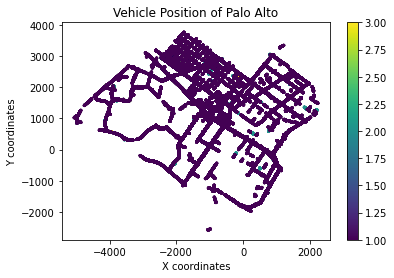

<Figure size 3600x3600 with 0 Axes>

In [7]:
for i_batch, sample_batch in enumerate(train_loader_pa):
    inp, out = sample_batch
    inp_pa = torch.reshape(inp, (-1,2))
    out_pa = torch.reshape(out, (-1,2))
    final = torch.vstack((inp_pa,out_pa))
    coord = pd.DataFrame(final).value_counts()
    x_cor = []
    y_cor = []
    for i in coord.keys():
        x_cor.append(i[0])
        y_cor.append(i[1])
    plt.scatter(x_cor,y_cor,c = coord,marker = ".", linewidths = 0.05)
    plt.title("Vehicle Position of Palo Alto")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.colorbar()
    plt.figure(figsize=(50,50))
    plt.show()
    break

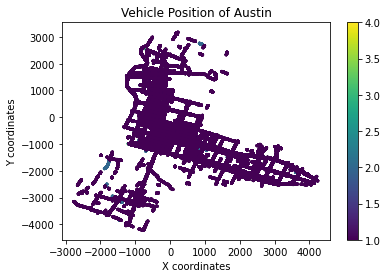

<Figure size 3600x3600 with 0 Axes>

In [8]:
for i_batch, sample_batch in enumerate(train_loader_au):
    inp, out = sample_batch
    inp_au = torch.reshape(inp, (-1,2))
    out_au = torch.reshape(out, (-1,2))
    final = torch.vstack((inp_au,out_au))
    coord = pd.DataFrame(final).value_counts()
    x_cor = []
    y_cor = []
    for i in coord.keys():
        x_cor.append(i[0])
        y_cor.append(i[1])
    plt.scatter(x_cor,y_cor,c = coord,marker = ".", linewidths = 0.05)
    plt.title("Vehicle Position of Austin")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.colorbar()
    plt.figure(figsize=(50,50))
    plt.show()
    break

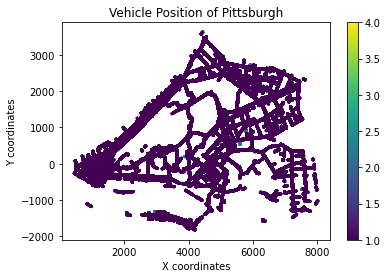

<Figure size 3600x3600 with 0 Axes>

In [9]:
for i_batch, sample_batch in enumerate(train_loader_pi):
    inp, out = sample_batch
    inp_pi = torch.reshape(inp, (-1,2))
    out_pi = torch.reshape(out, (-1,2))
    final = torch.vstack((inp_pi,out_pi))
    coord = pd.DataFrame(final).value_counts()
    x_cor = []
    y_cor = []
    for i in coord.keys():
        x_cor.append(i[0])
        y_cor.append(i[1])
    plt.scatter(x_cor,y_cor,c = coord,marker = ".", linewidths = 0.05)
    plt.title("Vehicle Position of Pittsburgh")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.colorbar()
    plt.figure(figsize=(50,50))
    plt.show()
    break

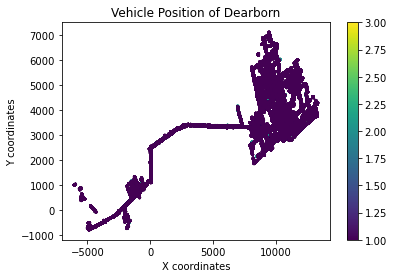

<Figure size 3600x3600 with 0 Axes>

In [10]:
for i_batch, sample_batch in enumerate(train_loader_db):
    inp, out = sample_batch
    inp_db = torch.reshape(inp, (-1,2))
    out_db = torch.reshape(out, (-1,2))
    final = torch.vstack((inp_db,out_db))
    coord = pd.DataFrame(final).value_counts()
    x_cor = []
    y_cor = []
    for i in coord.keys():
        x_cor.append(i[0])
        y_cor.append(i[1])
    plt.scatter(x_cor,y_cor,c = coord,marker = ".", linewidths = 0.05)
    plt.title("Vehicle Position of Dearborn")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.colorbar()
    plt.figure(figsize=(50,50))
    plt.show()
    break

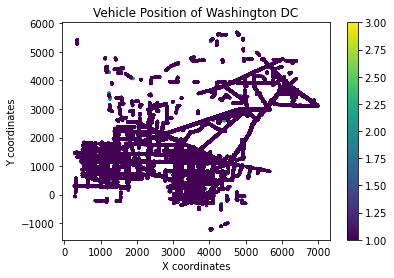

<Figure size 3600x3600 with 0 Axes>

In [11]:
for i_batch, sample_batch in enumerate(train_loader_dc):
    inp, out = sample_batch
    inp_dc = torch.reshape(inp, (-1,2))
    out_dc = torch.reshape(out, (-1,2))
    final = torch.vstack((inp_dc,out_dc))
    coord = pd.DataFrame(final).value_counts()
    x_cor = []
    y_cor = []
    for i in coord.keys():
        x_cor.append(i[0])
        y_cor.append(i[1])
    plt.scatter(x_cor,y_cor,c = coord,marker = ".", linewidths = 0.05)
    plt.title("Vehicle Position of Washington DC")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.colorbar()
    plt.figure(figsize=(50,50))
    plt.show()
    break

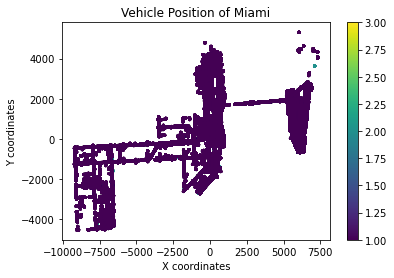

<Figure size 3600x3600 with 0 Axes>

In [12]:
for i_batch, sample_batch in enumerate(train_loader_mi):
    inp, out = sample_batch
    inp_mi = torch.reshape(inp, (-1,2))
    out_mi = torch.reshape(out, (-1,2))
    final = torch.vstack((inp_mi,out_mi))
    coord = pd.DataFrame(final).value_counts()
    x_cor = []
    y_cor = []
    for i in coord.keys():
        x_cor.append(i[0])
        y_cor.append(i[1])
    plt.scatter(x_cor,y_cor,c = coord,marker = ".", linewidths = 0.05)
    plt.title("Vehicle Position of Miami")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.colorbar()
    plt.figure(figsize=(50,50))
    plt.show()
    break

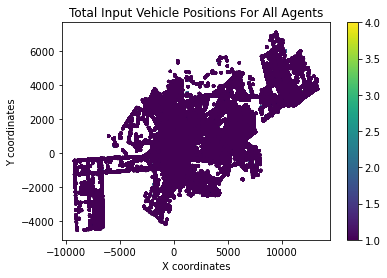

<Figure size 3600x3600 with 0 Axes>

In [18]:
all_points = pd.DataFrame(torch.vstack((inp_pa,inp_au,inp_pi,inp_db,inp_dc,inp_mi))).value_counts()
full_input_x = []
full_input_y = []
for i in all_points.keys():
    full_input_x.append(i[0])
    full_input_y.append(i[1])
plt.scatter(full_input_x,full_input_y,c = all_points,marker = ".", linewidths = 0.05)
plt.title("Total Input Vehicle Positions For All Agents")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.colorbar()
plt.figure(figsize=(50,50))
plt.show()

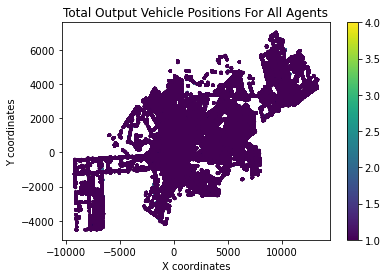

<Figure size 3600x3600 with 0 Axes>

In [19]:
all_points = pd.DataFrame(torch.vstack((out_pa,out_au,out_pi,out_db,out_dc,out_mi))).value_counts()
full_output_x = []
full_output_y = []
for i in all_points.keys():
    full_output_x.append(i[0])
    full_output_y.append(i[1])
plt.scatter(full_output_x,full_output_y,c = all_points,marker = ".", linewidths = 0.05)
plt.title("Total Output Vehicle Positions For All Agents")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.colorbar()
plt.figure(figsize=(50,50))
plt.show()